In [151]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import csv
from matplotlib import colors as mcolors
import math

# Montreal Gangs

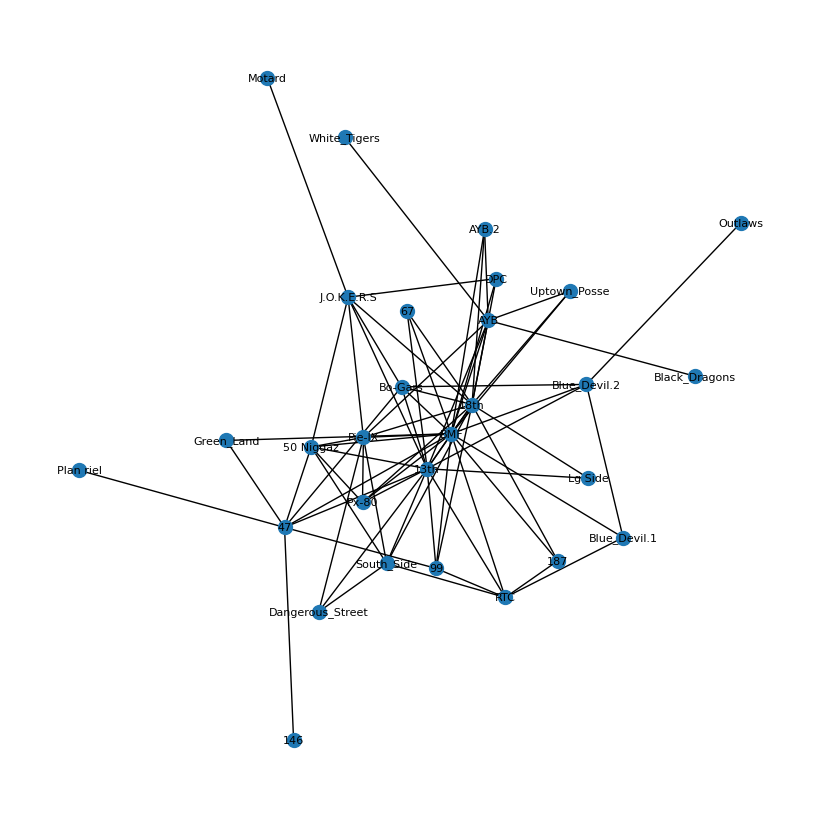

In [ ]:
# MONTRALGANG.csv
with open('CSV/MONTREALGANG_ATTR.csv', "r") as Montreal_Metadata:
    next(Montreal_Metadata, None)  # Skip header
    montreal_metadata = {}
    for row in csv.reader(Montreal_Metadata):
        affiliation = row[0]
        montreal_metadata[affiliation] = row[1:]

with open('CSV/MONTREALGANG.csv', "r") as Montreal_Data:
    next(Montreal_Data, None)
    labels = []
    montreal_adjacency_list = []

    for row in csv.reader(Montreal_Data):
        labels.append(row[0])
        montreal_adjacency_list.append([int(val) for val in row[1:]])

montreal_G = nx.Graph()
montreal_G.add_nodes_from(labels)

for i, row in enumerate(montreal_adjacency_list):
    for j, val in enumerate(row):
        if val == 1:
            montreal_G.add_edge(labels[i], labels[j])

# I am removing the smaller components of the graph as it interferes with path calculations later:
# reference: https://stackoverflow.com/questions/26105764/how-do-i-get-the-giant-component-of-a-networkx-graph  
montreal_components = sorted(nx.connected_components(montreal_G), key=len, reverse=True)
montreal_G = montreal_G.subgraph(montreal_components[0])

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(montreal_G, k=0.7, iterations=50)
nx.draw(montreal_G, pos, with_labels=True, node_size=100, font_size=8)
plt.show()

# London Gangs

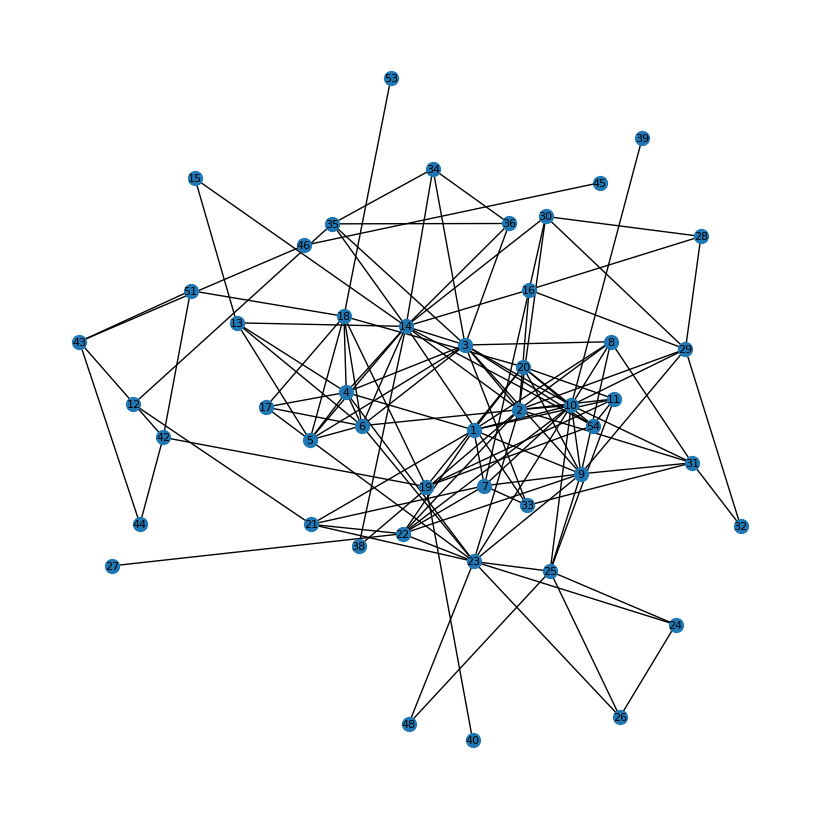

In [173]:
# LONDON_GANG.csv
with open('CSV/LONDON_GANG_ATTR.csv', "r") as London_Metadata:
    next(London_Metadata, None)
    london_metadata = {}
    for row in csv.reader(London_Metadata):
        affiliation = row[0]
        london_metadata[affiliation] = row[1:]

with open('CSV/LONDON_GANG.csv', "r") as London_Data:
    next(London_Data, None)
    labels = []
    london_adjacency_list = []

    for row in csv.reader(London_Data):
        labels.append(row[0])
        london_adjacency_list.append([int(val) for val in row[1:]])

london_G = nx.Graph()
london_G.add_nodes_from(labels)

for i, row in enumerate(london_adjacency_list):
    for j, val in enumerate(row):
        if val > 1: # <== not binary, I choose < 1 to indicate co-offenders in the same crime (1 represents association only)
            london_G.add_edge(labels[i], labels[j])

# I am removing the smaller components of the graph as it interferes with path calculations later:
# reference: https://stackoverflow.com/questions/26105764/how-do-i-get-the-giant-component-of-a-networkx-graph  
london_components = sorted(nx.connected_components(london_G), key=len, reverse=True)
london_G = london_G.subgraph(london_components[0])

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(london_G, k=0.7, iterations=50)
nx.draw(london_G, pos, with_labels=True, node_size=100, font_size=8)

# Degree Distribution

Text(0, 0.5, 'Degree')

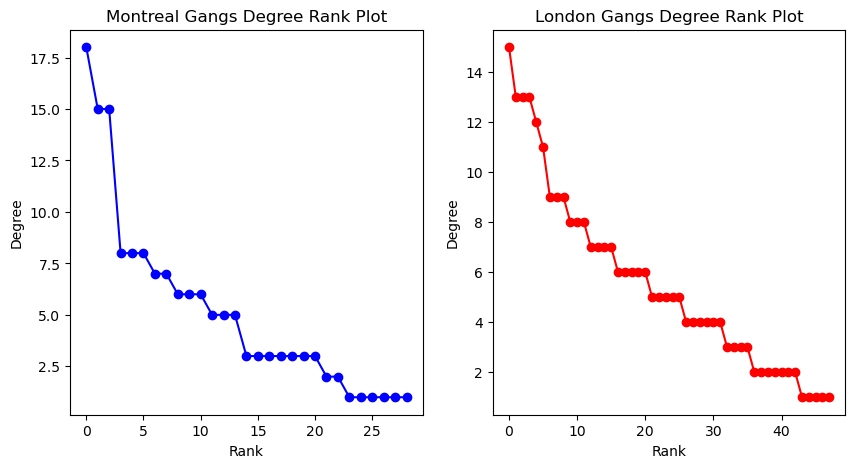

In [ ]:
# Compute the degree distribution of your networks
montreal_degree_sequence = [d for n, d in montreal_G.degree()]
london_degree_sequence = [d for n, d in london_G.degree()]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(sorted(montreal_degree_sequence, reverse=True), 'b-o')
ax[0].set_title("Montreal Gangs Degree Rank Plot")
ax[0].set_xlabel("Rank")
ax[0].set_ylabel("Degree")

ax[1].plot(sorted(london_degree_sequence, reverse=True), 'r-o')
ax[1].set_title("London Gangs Degree Rank Plot")
ax[1].set_xlabel("Rank")
ax[1].set_ylabel("Degree")

# Centrality Measure

Choose a centrality measure other than degree as a way of measuring the importance
of nodes in your networks. Compute the centrality measure of your choice for all
the nodes in your network.

In [121]:
# We will use Katz centrality to rank the nodes in the London and Montreal gangs
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html
# https://stackoverflow.com/questions/65796844/convert-list-into-dataframe-python-by-converting-list-elements-into-rows-and-col
montreal_katz = nx.katz_centrality(montreal_G)
london_katz = nx.katz_centrality(london_G)
montreal_katz_df = pd.DataFrame(list(montreal_katz.items()), columns=['Node', 'Katz'])
london_katz_df = pd.DataFrame(list(london_katz.items()), columns=['Node', 'Katz'])

In [213]:
print("Montreal Katz")
print(montreal_katz_df)

Montreal Katz
                Node      Katz
0            Bo-Gars  0.207416
1                BMF  0.384830
2         Green_Land  0.102708
3            Lg Side  0.113216
4          Plan riel  0.064225
5               18th  0.341544
6                187  0.134675
7              AYB.2  0.138180
8                AYB  0.215504
9       Uptown_Posse  0.138180
10  Dangerous_Street  0.120956
11               DPC  0.136528
12       J.O.K.E.R.S  0.198984
13            Pie-IX  0.230601
14             Px-80  0.196683
15         50 Niggaz  0.219238
16              13th  0.350695
17                67  0.151699
18                99  0.189977
19               146  0.064225
20     Black_Dragons  0.065543
21           Outlaws  0.059578
22        South_Side  0.188342
23      White_Tigers  0.065543
24            Motard  0.063891
25                47  0.202324
26      Blue_Devil.1  0.116107
27      Blue_Devil.2  0.155855
28               RTC  0.180455


In [118]:
print("London Katz")
print(london_katz_df)

London Katz
   Node      Katz
0     1  0.196833
1     2  0.271591
2     3  0.272316
3     4  0.207180
4     5  0.189286
5     6  0.213976
6     7  0.159406
7     8  0.172761
8     9  0.242128
9    10  0.272258
10   11  0.131297
11   12  0.055556
12   13  0.126684
13   14  0.259071
14   15  0.071189
15   16  0.136195
16   17  0.107647
17   18  0.139890
18   19  0.097435
19   20  0.152990
20   21  0.116552
21   22  0.187624
22   23  0.239962
23   24  0.078907
24   25  0.144061
25   26  0.078907
26   27  0.051376
27   28  0.073461
28   29  0.150578
29   30  0.121703
30   31  0.146351
31   32  0.062307
32   33  0.116328
33   34  0.107822
34   35  0.112872
35   36  0.107822
36   38  0.085680
37   39  0.059840
38   40  0.042357
39   42  0.057755
40   43  0.052675
41   44  0.043657
42   45  0.036770
43   46  0.041558
44   48  0.071016
45   51  0.057646
46   53  0.046603
47   54  0.123925


# Network Transitivity & Path Length

In [120]:
#calculate transitivity
montreal_transitivity = nx.transitivity(montreal_G)
london_transitivity = nx.transitivity(london_G)

print("Montreal Transitivity: ", montreal_transitivity)
print("London Transitivity: ", london_transitivity)

# mean shortest pathlength
montreal_mean_shortest_path = nx.average_shortest_path_length(montreal_G)
london_mean_shortest_path = nx.average_shortest_path_length(london_G)

print("Montreal Mean Shortest Path: ", montreal_mean_shortest_path)
print("London Mean Shortest Path: ", london_mean_shortest_path)

Montreal Transitivity:  0.3373083475298126
London Transitivity:  0.3635371179039301
Montreal Mean Shortest Path:  2.1527093596059115
London Mean Shortest Path:  2.9210992907801416


# Plot

Create an attractive plot of your two networks in which the size of each node
reflects its centrality. Change the color of the nodes from the default. Feel free to
be creative!


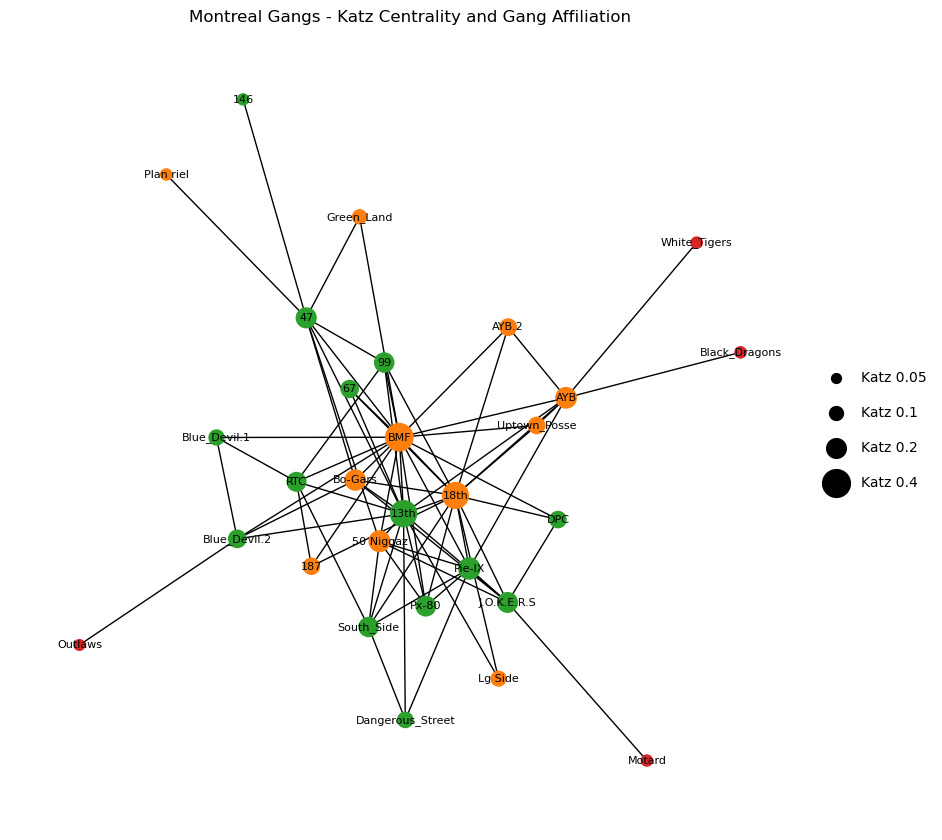

In [179]:
node_sizes = [montreal_katz[node] * 1000 for node in montreal_G.nodes()]

# https://stackoverflow.com/questions/26985594/how-can-i-map-the-colors-of-a-node-according-to-the-value-of-a-attribute-using-n 
unique_gang_affiliations = set([int(val[0]) for val in montreal_metadata.values()])
color_map = {affiliation: color for affiliation, color in zip(unique_gang_affiliations, mcolors.TABLEAU_COLORS)}
node_colors = [color_map[int(montreal_metadata[node][0])] for node in montreal_G.nodes()]

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(montreal_G)
nx.draw(montreal_G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=8)
plt.title("Montreal Gangs - Katz Centrality and Gang Affiliation")

# How to add a legend based on node size: https://stackoverflow.com/questions/71717656/plot-node-size-as-legend-using-networkx 
for n in [0.05, 0.1, 0.2, 0.4]:
    plt.scatter([], [], s=n * 1000, color='black', label=f"Katz {n}")
plt.legend(labelspacing=1.5, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# green = crips, orange = bloods, red = other

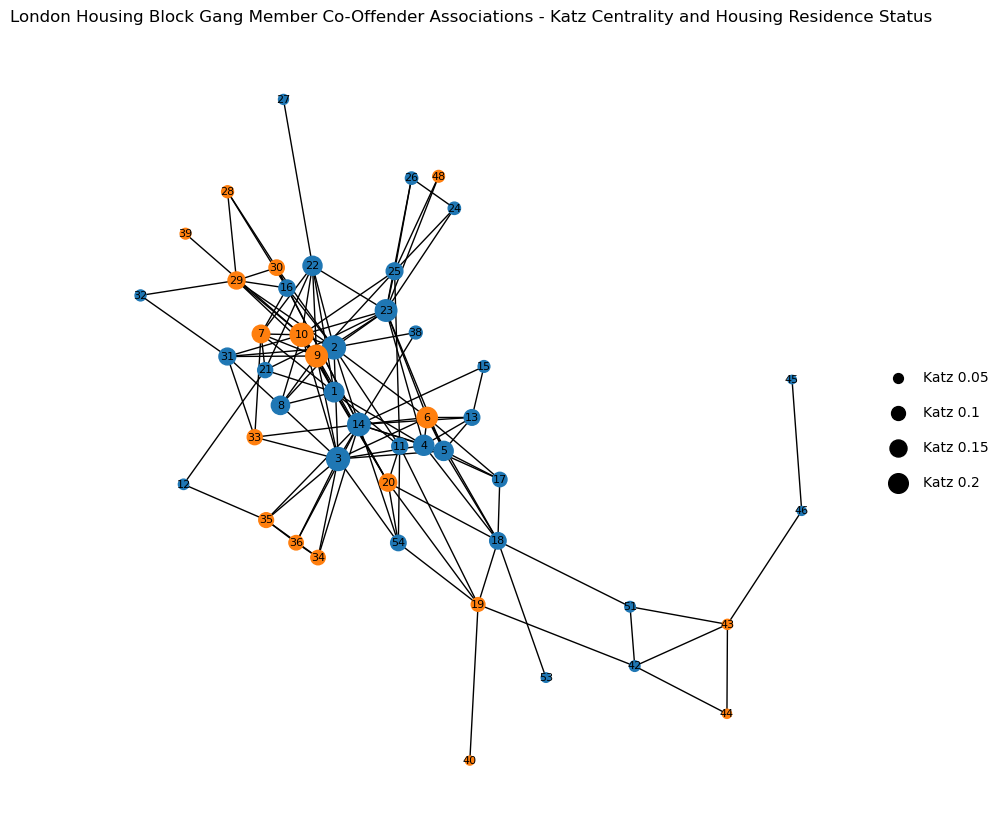

In [212]:
node_sizes = [london_katz[node] * 1000 for node in london_G.nodes()]

# https://stackoverflow.com/questions/26985594/how-can-i-map-the-colors-of-a-node-according-to-the-value-of-a-attribute-using-n 
unique_birthplaces = set([int(val[2]) for val in london_metadata.values()])
color_map = {birthplace: color for birthplace, color in zip(unique_birthplaces, mcolors.TABLEAU_COLORS)}
node_colors = [color_map[int(london_metadata[node][2])] for node in london_G.nodes()]

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(london_G)
nx.draw(london_G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=8)
plt.title("London Housing Block Gang Member Co-Offender Associations - Katz Centrality and Housing Residence Status")

# How to add a legend based on node size: https://stackoverflow.com/questions/71717656/plot-node-size-as-legend-using-networkx 
for n in [0.05, 0.1, 0.15, 0.2]:
    plt.scatter([], [], s=n * 1000, color='black', label=f"Katz {n}")
plt.legend(labelspacing=1.5, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Orange = residence, blue = non-residence